# Plot the positions (namely x, y, z) of the data in 3 subplots

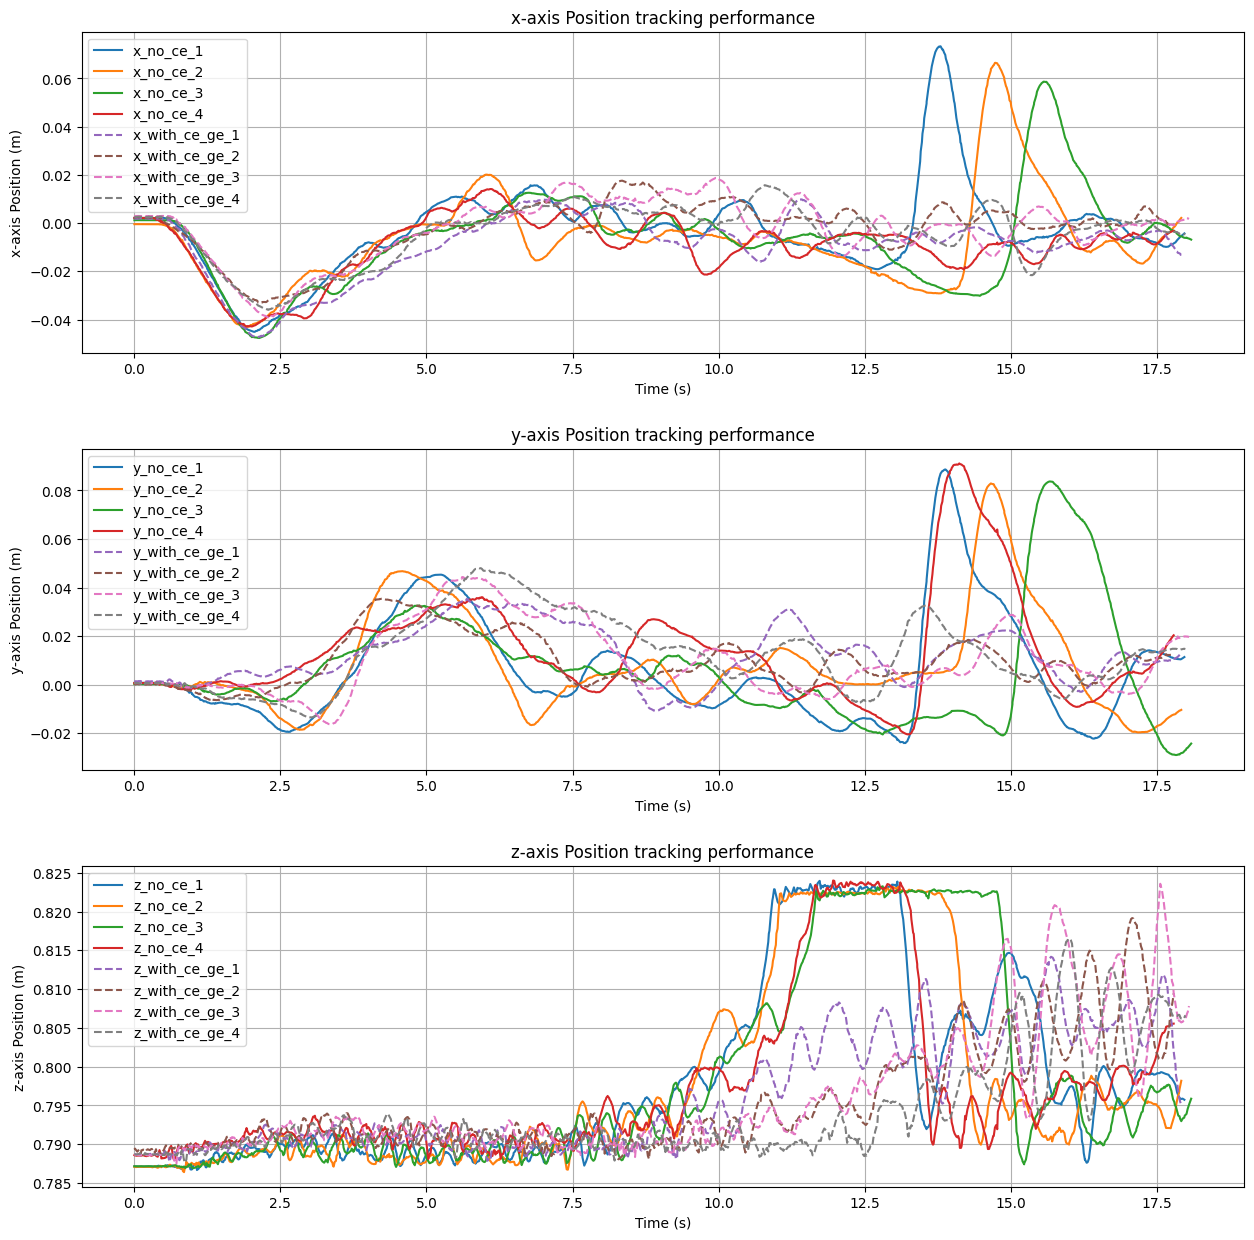

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_tracking_performance(data_label_pairs, start_time=9, line_style='-'):
    """
    Plot tracking performance for multiple datasets.

    Parameters:
    - data_label_pairs: List of tuples, each containing a label and a file path to the CSV file.
    - start_time: Time in seconds to start plotting from (default is 9 seconds).
    """
    data_list = []
    labels = []
    
    # Load and filter data
    for label, file_path in data_label_pairs:
        data = pd.read_csv(file_path)
        data_filtered = data[data['t'] - data['t'].iloc[0] > start_time]
        data_list.append(data_filtered)
        labels.append(label)
    
    # Plotting
    plt.figure(figsize=(15, 15))

    axes = ['x', 'y', 'z']
    for i, axis in enumerate(axes):
        plt.subplot(3, 1, i + 1)
        for idx, (data, label) in enumerate(zip(data_list, labels)):
            if idx < 4:
                line_style = '-'
            else:
                line_style = '--'
            # plt.plot(data['t'] - data['t'].iloc[0], data[axis]-data[axis].iloc[0], label=f'{axis}_{label}')
            plt.plot(data['t'] - data['t'].iloc[0], data[axis], label=f'{axis}_{label}', linestyle = line_style)
        plt.xlabel('Time (s)')
        plt.ylabel(f'{axis}-axis Position (m)')
        plt.title(f'{axis}-axis Position tracking performance')
        plt.legend(loc='upper left')
        plt.grid(True)

    plt.subplots_adjust(hspace=0.3)  # adjust the vertical space to 30 percent of the subplot height
    plt.show()

# Example usage
data_label_pairs = [
    # ('no_ce_ge_4', os.path.join("mocap_data", "20240827_19_49_47.csv")), # a successful flight
    # ('no_ce_ge_3', os.path.join("mocap_data", "20240827_19_51_43.csv")), # sucked to the ceiling
    # ('no_ce_ge_2', os.path.join("mocap_data", "20240827_19_54_41.csv")), # a successful flight
    # ('no_ce_ge_4', os.path.join("mocap_data", "20240827_19_56_47.csv")), # a successful flight
    
    ('no_ce_1', os.path.join("mocap_data", "20240907_15_45_03.csv")), # with ceiling sucked to the ceiling and then recover
    ('no_ce_2', os.path.join("mocap_data", "20240907_15_52_28.csv")), # same as the last one
    ('no_ce_3', os.path.join("mocap_data", "20240907_15_57_13.csv")), # same, shit
    ('no_ce_4', os.path.join("mocap_data", "20240907_22_22_14.csv")), # same shit

    ('with_ce_ge_1', os.path.join("mocap_data", "20240907_23_31_17.csv")), # 起始点是原点
    ('with_ce_ge_2', os.path.join("mocap_data", "20240907_23_43_25.csv")), # 原点（好像有那么一霎那碰到顶了？）
    ('with_ce_ge_3', os.path.join("mocap_data", "20240907_23_44_50.csv")), # 原点（好像有那么一霎那碰到顶了？）
    ('with_ce_ge_4', os.path.join("mocap_data", "20240907_23_47_39.csv")), # 原点（没有碰到）
    
]

plot_tracking_performance(data_label_pairs, 7)

# Plot the rotation (namely roll, pitch, yaw) of the data in 3 subplots

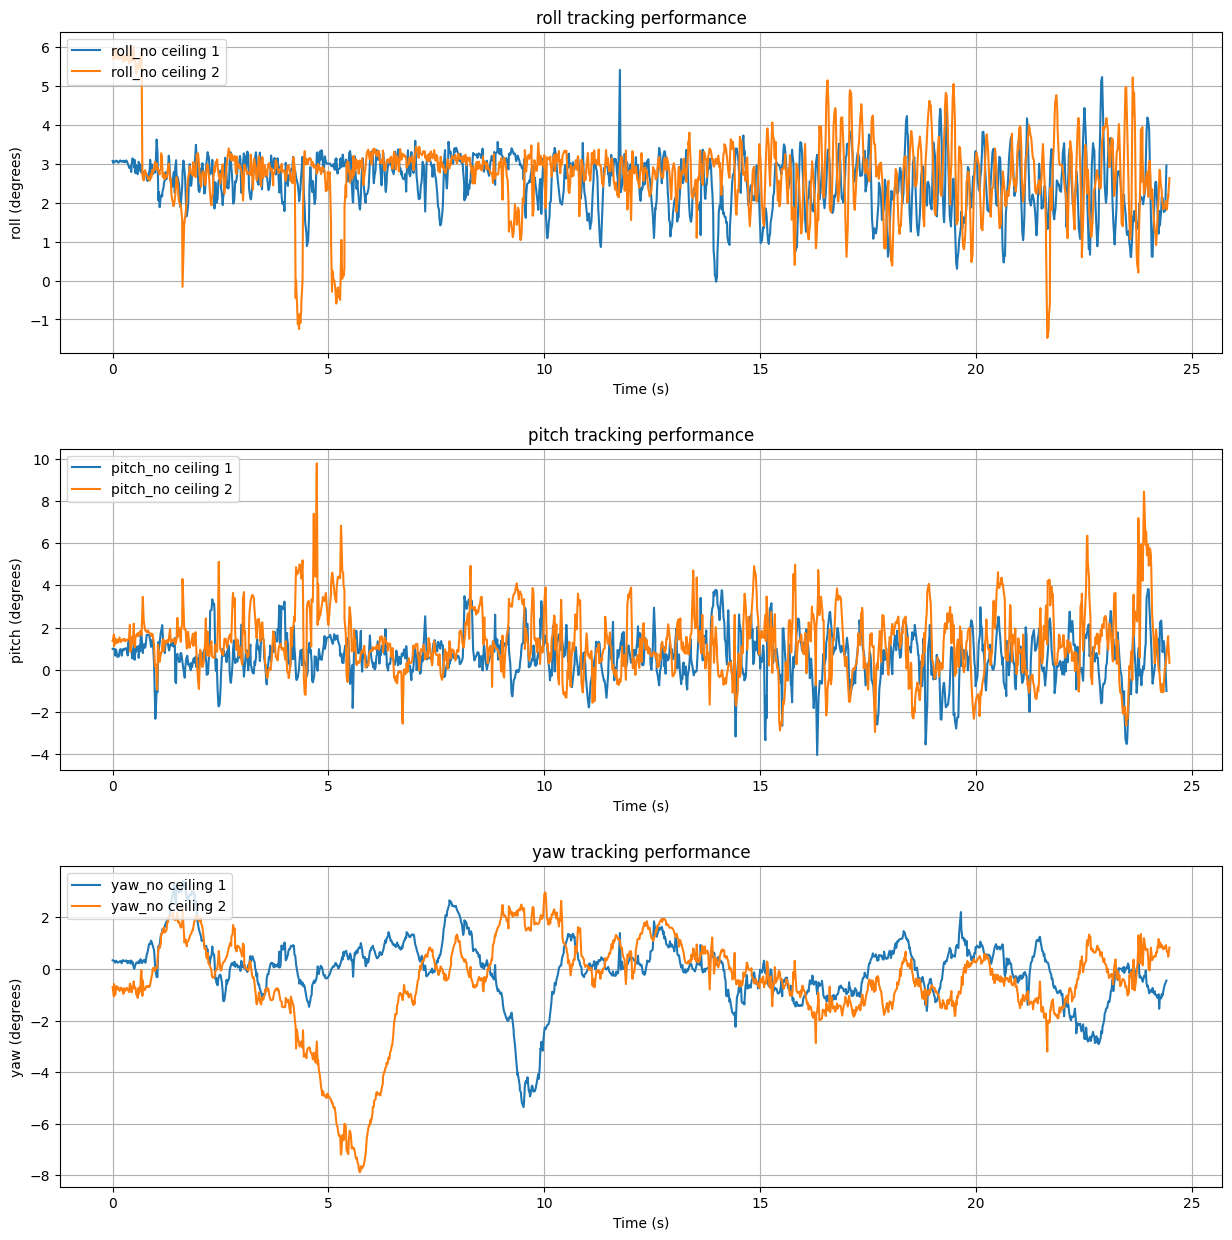

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.spatial.transform import Rotation as R

def plot_tracking_performance(data_label_pairs, start_time=9):
    """
    Plot tracking performance for multiple datasets.

    Parameters:
    - data_label_pairs: List of tuples, each containing a label and a file path to the CSV file.
    - start_time: Time in seconds to start plotting from (default is 9 seconds).
    """
    data_list = []
    labels = []
    
    # Load and filter data
    for label, file_path in data_label_pairs:
        data = pd.read_csv(file_path)
        data_filtered = data[data['t'] - data['t'].iloc[0] > start_time].copy()
        
        # Convert quaternion to euler angles
        quaternions = data_filtered[['qx', 'qy', 'qz', 'qw']]
        r = R.from_quat(quaternions)
        euler_angles = r.as_euler('xyz', degrees=True)
        data_filtered.loc[:, 'roll'] = euler_angles[:, 0]
        data_filtered.loc[:, 'pitch'] = euler_angles[:, 1]
        data_filtered.loc[:, 'yaw'] = euler_angles[:, 2]
        
        data_list.append(data_filtered)
        labels.append(label)
    
    # Plotting
    plt.figure(figsize=(15, 15))

    axes = ['roll', 'pitch', 'yaw']
    for i, axis in enumerate(axes):
        plt.subplot(3, 1, i + 1)
        for data, label in zip(data_list, labels):
            plt.plot(data['t'] - data['t'].iloc[0], data[axis], label=f'{axis}_{label}')
        plt.xlabel('Time (s)')
        plt.ylabel(f'{axis} (degrees)')
        plt.title(f'{axis} tracking performance')
        plt.legend(loc='upper left')
        plt.grid(True)

    plt.subplots_adjust(hspace=0.3)  # adjust the vertical space to 30 percent of the subplot height
    plt.show()

# Example usage
data_label_pairs = [
    # ('6 block 3', os.path.join("mocap_data", "20240823_23_32_30.csv")),
    ('no ceiling 1', os.path.join("mocap_data", "20240823_17_47_21.csv")),
    ('no ceiling 2', os.path.join("mocap_data", "20240823_19_27_09.csv")),
    # ('no ceiling 3', os.path.join("mocap_data", "20240823_22_50_12.csv")),
]

plot_tracking_performance(data_label_pairs, 7)

# 3D plot without view angle control

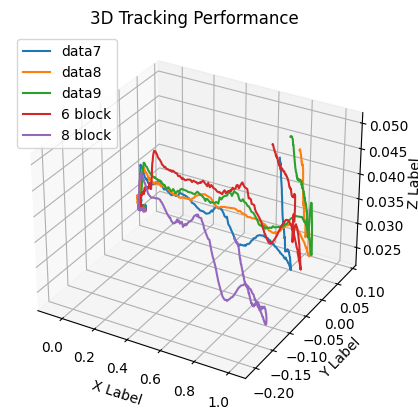

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

def plot_3d_tracking_performance(data_label_pairs, start_time=9):
    """
    Plot 3D tracking performance for multiple datasets.

    Parameters:
    - data_label_pairs: List of tuples, each containing a label and a file path to the CSV file.
    - start_time: Time in seconds to start plotting from (default is 9 seconds).
    """
    data_list = []
    labels = []
    
    # Load and filter data
    for label, file_path in data_label_pairs:
        data = pd.read_csv(file_path)
        data_filtered = data[data['t'] - data['t'].iloc[0] > start_time]
        data_list.append(data_filtered)
        labels.append(label)
    
    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for data, label in zip(data_list, labels):
        t = data['t'] - data['t'].iloc[0]
        x = data['x'] - data['x'].iloc[0]
        y = data['y'] - data['y'].iloc[0]
        # z = data['z'] - data['z'].iloc[0]
        z = data['z']
        ax.plot(x, y, z, label=label)

    # 添加标签
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title('3D Tracking Performance')

    # 显示图例
    ax.legend()

    # 显示图形
    plt.show()

# 示例用法
data_label_pairs = [
    # ('data1', os.path.join("mocap_data", "20240815_00_39_35.csv")),
    # ('data2', os.path.join("mocap_data", "20240815_00_45_16.csv")),
    # ('data3', os.path.join("mocap_data", "20240815_14_26_14.csv")),
    # ('data4', os.path.join("mocap_data", "20240815_19_57_56.csv")),
    # ('data5', os.path.join("mocap_data", "20240815_19_58_50.csv")),
    # ('data6', os.path.join("mocap_data", "20240811_00_13_46.csv")),
    ('data7', os.path.join("mocap_data", "20240811_00_55_50.csv")),
    ('data8', os.path.join("mocap_data", "20240811_01_00_15.csv")),
    ('data9', os.path.join("mocap_data", "20240811_01_14_19.csv")),
    ('6 block', os.path.join("mocap_data", "20240811_01_15_48.csv")),
    ('8 block', os.path.join("mocap_data", "20240811_01_38_40.csv")),
    # ('data9', os.path.join("mocap_data", "20240811_01_18_00.csv")),
    # ('data9', os.path.join("mocap_data", "20240811_01_19_00.csv")),
    # ('data9', os.path.join("mocap_data", "20240811_01_20_00.csv")),
    # ('data9', os.path.join("mocap_data", "20240811_01_21_00.csv")),
    # ('data9', os.path.join("mocap_data", "20240811_01_22_00.csv")),
    # ('data9', os.path.join("mocap_data", "20240811_01_23_00.csv")),
    # ('data9', os.path.join("mocap_data", "20240811_01_24_00.csv")),
    # ('data9', os.path.join("mocap_data", "20240811_01_25_00.csv")),
    # ('data9', os.path.join("mocap_data", "20240811_01_26_00.csv")),
    # ('data9', os.path.join("mocap_data", "20240811_01_27_00.csv")),

]

plot_3d_tracking_performance(data_label_pairs, 7)

# 3D Plot with view angle control

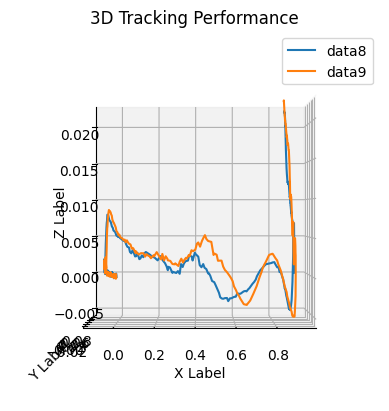

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

def plot_3d_tracking_performance(data_label_pairs, start_time=9, elev=30, azim=30):
    """
    Plot 3D tracking performance for multiple datasets.

    Parameters:
    - data_label_pairs: List of tuples, each containing a label and a file path to the CSV file.
    - start_time: Time in seconds to start plotting from (default is 9 seconds).
    - elev: Elevation angle in the z plane (default is 30 degrees).
    - azim: Azimuth angle in the x,y plane (default is 30 degrees).
    """
    data_list = []
    labels = []
    
    # Load and filter data
    for label, file_path in data_label_pairs:
        data = pd.read_csv(file_path)
        data_filtered = data[data['t'] - data['t'].iloc[0] > start_time]
        data_list.append(data_filtered)
        labels.append(label)
    
    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for data, label in zip(data_list, labels):
        t = data['t'] - data['t'].iloc[0]
        x = data['x'] - data['x'].iloc[0]
        y = data['y'] - data['y'].iloc[0]
        z = data['z'] - data['z'].iloc[0]
        ax.plot(x, y, z, label=label)

    # 添加标签
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title('3D Tracking Performance')

    # 设置视角
    ax.view_init(elev=elev, azim=azim)
    ax.set_box_aspect([1, 1, 1])  # 设置坐标轴比例

    # 显示图例
    ax.legend()

    # 显示图形
    plt.show()

# 示例用法
data_label_pairs = [
    # ('data1', os.path.join("mocap_data", "20240815_00_39_35.csv")),
    # ('data2', os.path.join("mocap_data", "20240815_00_45_16.csv")),
    # ('data3', os.path.join("mocap_data", "20240815_14_26_14.csv")),
    # ('data4', os.path.join("mocap_data", "20240815_19_57_56.csv")),
    # ('data5', os.path.join("mocap_data", "20240815_19_58_50.csv")),
    # ('data6', os.path.join("mocap_data", "20240815_20_00_27.csv"))，
    # ('data7', os.path.join("mocap_data", "20240815_22_05_06.csv")),
    ('data8', os.path.join("mocap_data", "20240811_01_14_19.csv")),
    ('data9', os.path.join("mocap_data", "20240811_01_15_48.csv")),
]

plot_3d_tracking_performance(data_label_pairs, 0, elev=0, azim=-90)

# 3D Plot with real-time view angle control

In [8]:
import pandas as pd
import plotly.graph_objects as go
import os

def plot_3d_tracking_performance(data_label_pairs, start_time=9):
    """
    Plot 3D tracking performance for multiple datasets using Plotly.

    Parameters:
    - data_label_pairs: List of tuples, each containing a label and a file path to the CSV file.
    - start_time: Time in seconds to start plotting from (default is 9 seconds).
    """
    fig = go.Figure()

    # Load and filter data
    for label, file_path in data_label_pairs:
        data = pd.read_csv(file_path)
        data_filtered = data[data['t'] - data['t'].iloc[0] > start_time]
        
        t = data_filtered['t']# - data_filtered['t'].iloc[0]
        x = data_filtered['x']# - data_filtered['x'].iloc[0]
        y = data_filtered['y']# - data_filtered['y'].iloc[0]
        z = data_filtered['z']# - data_filtered['z'].iloc[0]
        
        fig.add_trace(go.Scatter3d(
            x=x, y=y, z=z,
            mode='lines',
            name=label
        ))

    # 添加标签
    fig.update_layout(
        title='3D Tracking Performance',
        scene=dict(
            xaxis_title='X Label',
            yaxis_title='Y Label',
            zaxis_title='Z Label'
        ),
        width = 1000,
        height = 800
    )

    # 显示图形
    fig.show()

# 示例用法
data_label_pairs = [
    # ('data7', os.path.join("mocap_data", "20240811_00_55_50.csv")),
    # ('data8', os.path.join("mocap_data", "20240811_01_00_15.csv")),
    # ('data9', os.path.join("mocap_data", "20240811_01_14_19.csv")),
    # ('6 block', os.path.join("mocap_data", "20240811_01_15_48.csv")),
    ('8 block', os.path.join("mocap_data", "20240823_20_17_17.csv")),
]

plot_3d_tracking_performance(data_label_pairs, 7)

# 3D Plot Supporting Real-Time View Angle Adjustment and Manual Range Control

In [20]:
import pandas as pd
import plotly.graph_objects as go
import os

def plot_3d_tracking_performance(data_label_pairs, start_time=9, x_range=None, y_range=None, z_range=None):
    """
    Plot 3D tracking performance for multiple datasets using Plotly.

    Parameters:
    - data_label_pairs: List of tuples, each containing a label and a file path to the CSV file.
    - start_time: Time in seconds to start plotting from (default is 9 seconds).
    - x_range: Tuple specifying the range of the x-axis (default is None).
    - y_range: Tuple specifying the range of the y-axis (default is None).
    - z_range: Tuple specifying the range of the z-axis (default is None).
    """
    fig = go.Figure()

    # Load and filter data
    for label, file_path in data_label_pairs:
        data = pd.read_csv(file_path)
        data_filtered = data[data['t'] - data['t'].iloc[0] > start_time]
        
        t = data_filtered['t']
        x = data_filtered['x']
        y = data_filtered['y']
        z = data_filtered['z']
        
        fig.add_trace(go.Scatter3d(
            x=x, y=y, z=z,
            mode='lines',
            name=label
        ))

    # 添加标签和设置坐标轴范围
    fig.update_layout(
        title='3D Tracking Performance',
        scene=dict(
            xaxis=dict(title='X Label', range=x_range),
            yaxis=dict(title='Y Label', range=y_range),
            zaxis=dict(title='Z Label', range=z_range)
        ),
        width=1000,
        height=800
    )

    # 显示图形
    fig.show()

# 示例用法
data_label_pairs = [
    ('8 block', os.path.join("mocap_data", "20240823_20_17_17.csv")),
]

# 设置坐标轴范围
x_range = [- 0.5 , 0.1]
y_range = [- 0.1, 0.1]
z_range = [0.75, 0.9]

plot_3d_tracking_performance(data_label_pairs, 7, x_range, y_range, z_range)